In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\mruna\Documents\Machine Learning\Datasets\Iris Species\Iris.csv") ## Load data
df = df.drop(['Id'],axis=1)
rows = list(range(100,150))
df = df.drop(df.index[rows])  ## Drop the rows with target values Iris-virginica
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(0)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()

In [3]:
    from sklearn.utils import shuffle
    from sklearn.cross_validation import train_test_split
    import numpy as np

    X, Y = shuffle(X,Y)

    x_train = []
    y_train = []
    x_test = []
    y_test = []

    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)

    x_1 = x_train[:,0]
    x_2 = x_train[:,1]
    x_3 = x_train[:,2]
    x_4 = x_train[:,3]

    x_1 = np.array(x_1)
    x_2 = np.array(x_2)
    x_3 = np.array(x_3)
    x_4 = np.array(x_4)

    x_1 = x_1.reshape(90,1)
    x_2 = x_2.reshape(90,1)
    x_3 = x_3.reshape(90,1)
    x_4 = x_4.reshape(90,1)

    y_train = y_train.reshape(90,1)

C:\Users\mruna\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
## Logistic Regression 
import numpy as np

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

m = 90
alpha = 0.0001

theta_0 = np.zeros((m,1))
theta_1 = np.zeros((m,1))
theta_2 = np.zeros((m,1))
theta_3 = np.zeros((m,1))
theta_4 = np.zeros((m,1))


epochs = 0
cost_func = []
while(epochs < 10000):
    y = theta_0 + theta_1 * x_1 + theta_2 * x_2 + theta_3 * x_3 + theta_4 * x_4
    y = sigmoid(y)
    
    cost = (- np.dot(np.transpose(y_train),np.log(y)) - np.dot(np.transpose(1-y_train),np.log(1-y)))/m
    
    theta_0_grad = np.dot(np.ones((1,m)),y-y_train)/m
    theta_1_grad = np.dot(np.transpose(x_1),y-y_train)/m
    theta_2_grad = np.dot(np.transpose(x_2),y-y_train)/m
    theta_3_grad = np.dot(np.transpose(x_3),y-y_train)/m
    theta_4_grad = np.dot(np.transpose(x_4),y-y_train)/m
    
    theta_0 = theta_0 - alpha * theta_0_grad
    theta_1 = theta_1 - alpha * theta_1_grad
    theta_2 = theta_2 - alpha * theta_2_grad
    theta_3 = theta_3 - alpha * theta_3_grad
    theta_4 = theta_4 - alpha * theta_4_grad
    
    cost_func.append(cost)
    epochs += 1

In [5]:
from sklearn.metrics import accuracy_score

test_x_1 = x_test[:,0]
test_x_2 = x_test[:,1]
test_x_3 = x_test[:,2]
test_x_4 = x_test[:,3]

test_x_1 = np.array(test_x_1)
test_x_2 = np.array(test_x_2)
test_x_3 = np.array(test_x_3)
test_x_4 = np.array(test_x_4)

test_x_1 = test_x_1.reshape(10,1)
test_x_2 = test_x_2.reshape(10,1)
test_x_3 = test_x_3.reshape(10,1)
test_x_4 = test_x_4.reshape(10,1)

index = list(range(10,90))

theta_0 = np.delete(theta_0, index)
theta_1 = np.delete(theta_1, index)
theta_2 = np.delete(theta_2, index)
theta_3 = np.delete(theta_3, index)
theta_4 = np.delete(theta_4, index)

theta_0 = theta_0.reshape(10,1)
theta_1 = theta_1.reshape(10,1)
theta_2 = theta_2.reshape(10,1)
theta_3 = theta_3.reshape(10,1)
theta_4 = theta_4.reshape(10,1)

y_pred = theta_0 + theta_1 * test_x_1 + theta_2 * test_x_2 + theta_3 * test_x_3 + theta_4 * test_x_4
y_pred = sigmoid(y_pred)

new_y_pred =[]
for val in y_pred:
    if(val >= 0.5):
        new_y_pred.append(1)
    else:
        new_y_pred.append(0)

print(accuracy_score(y_test,new_y_pred))

1.0


In [6]:
#PLOTTING THE COST FUNCTION
import matplotlib.pyplot as plt

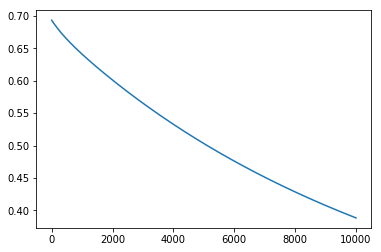

In [7]:
cost_func = np.array(cost_func)
cost_func = cost_func.reshape(10000,1)
plt.plot(range(len(cost_func)),cost_func)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [9]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

C:\Users\mruna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0
